In [1]:
# Importing the libraries to work with

# Getting and preparing the data
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Fitting the model curve
from scipy.optimize import curve_fit

In [2]:
# Defining the model function for data fitting: simple exponential
def f_pan(t,a,b):
    return (a*np.exp(b*t))

In [9]:
#Importing the data
#trying to import data directly from google sheets!
#data_raw = pd.read_csv("https://docs.google.com/spreadsheets/d/1bZXurHt0wt4I_j2rvcKA5yDfwArZBDar-woyBZS7TJ8/gviz/tq?tqx=out:csv&sheet=fulltaubate")
#data_raw = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
#                   '1bZXurHt0wt4I_j2rvcKA5yDfwArZBDar-woyBZS7TJ8' +
#                   '/export?gid=0&format=csv',
                   # Set first column as rownames in data frame
#                   index_col=0,
                   # Parse column values to datetime
#                   parse_dates=['Quradate']
#                  )
data_raw = pd.read_csv("taubatedeaths - fulltaubate.csv")
#display(data_raw)

# Extracting columns to work with
days = np.array(data_raw.loc[:,"day_since_1st"])
cases = np.array(data_raw.loc[:,"cases"])
days_month = np.array(data_raw.loc[:,"day_month"])
months = np.array(data_raw.loc[:,"month"])

# Erasing NANs from dataset
selector = ~np.isnan(cases)
cases = cases[selector]
days = days[selector]
days_month = days_month[selector]
months = months[selector]

In [10]:
# Fitting the curve
pars, cov = curve_fit(f = f_pan, xdata = days, ydata = cases, p0=[0,0],bounds=(-np.inf,np.inf))

a,b = pars

# doubling days
from math import log
daystodouble = log(2)/b

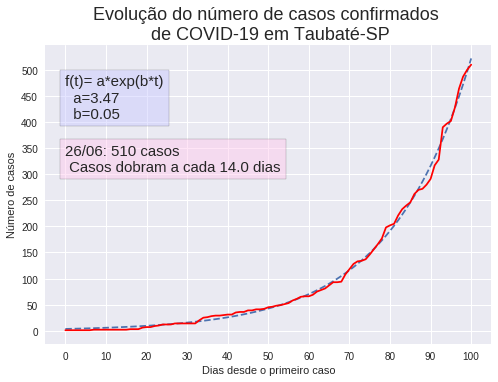

In [11]:
### Creating the plot
# annotations
fig = plt.figure()
ax = fig.add_subplot(111)
stringtoprint1 = str(int(days_month[-1]))+"/0"+str(int(months[-1]))+": "+str(int(cases[-1]))+" casos"+"\n Casos dobram a cada "+str(round(daystodouble))+" dias"
stringtoprint2 = "f(t)= a*exp(b*t)\n  a="+str(round(a,2))+"\n  b="+str(round(b,2))
ax.text(0,0.6*max(cases),stringtoprint1,fontsize=15, bbox={'facecolor': '#ffccee', 'alpha': 0.5, 'pad': 5})
ax.text(0,0.8*max(cases),stringtoprint2,fontsize=15, bbox={'facecolor': '#ccccff', 'alpha': 0.5, 'pad': 5})

# data
plt.plot(f_pan(days,*pars), linestyle="--")     # Took parameters directly from curve_fit output
#plt.plot(fteste(days),linestyle='--')          # Since I was suspicious: I manually built a function to test the parameters correctness (they were allright)
plt.plot(days,cases,color='#ff0000')

# style and appearance
plt.style.use('seaborn')
plt.grid(True)
x_ticks_aux_var = 10                                                    # In these lines, I've only used a trick to get the
plt.xticks(x_ticks_aux_var*np.array(range(int(len(days)/x_ticks_aux_var+1))))     # desired axes ticks: took each set range, divided to
y_ticks_aux_var = 50                                                    # pass the result to range, and made an np.array with
plt.yticks(y_ticks_aux_var*np.array(range(int(max(cases)/y_ticks_aux_var+1))))    # them. Finally, re-multiplied to get the right scale
plt.title("Evolução do número de casos confirmados \n de COVID-19 em Taubaté-SP",fontsize=18)      # There probably are much bettter ways to do it
plt.xlabel("Dias desde o primeiro caso")
plt.ylabel("Número de casos");